In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


In [10]:
glass=pd.read_csv("Glass.csv")
y=glass['Type']
X=glass.drop('Type',axis=1)


In [11]:
knn=KNeighborsClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=25,stratify=y)

In [12]:
scaler=StandardScaler()
x_trn_scl=scaler.fit_transform(X_train)
x_tst_scl=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_trn_scl,y_train)
y_pred=knn.predict(x_tst_scl)
accuracy_score(y_test,y_pred)

0.8

In [13]:
ks=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for k in ks:
     knn=KNeighborsClassifier(n_neighbors=k)
     knn.fit(x_trn_scl,y_train)
     y_pred=knn.predict(x_tst_scl)
     scores.append([k,accuracy_score(y_test,y_pred)])
df_scores=pd.DataFrame(scores,columns=['k','acc_score'])
df_scores.sort_values('acc_score',ascending=False)

,k,acc_score
1,2,0.815385
0,1,0.800000
2,3,0.753846
3,4,0.738462
5,6,0.692308
6,7,0.692308
4,5,0.676923
7,8,0.661538
8,9,0.661538
9,10,0.646154


In [18]:
scalar=MinMaxScaler()
x_trn_scl=scalar.fit_transform(x_trn_scl)
x_tst_scl=scalar.transform(x_tst_scl)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_trn_scl,y_train)
y_pred=knn.predict(x_tst_scl)
print(y_pred)

['building_windows_float_processed' 'building_windows_non_float_processed'
 'building_windows_non_float_processed'
 'building_windows_non_float_processed'
 'building_windows_non_float_processed'
 'building_windows_non_float_processed' 'building_windows_float_processed'
 'building_windows_non_float_processed'
 'building_windows_non_float_processed' 'building_windows_float_processed'
 'building_windows_non_float_processed' 'building_windows_float_processed'
 'building_windows_non_float_processed' 'tableware' 'headlamps'
 'building_windows_float_processed' 'tableware'
 'building_windows_non_float_processed' 'building_windows_float_processed'
 'tableware' 'building_windows_float_processed'
 'vehicle_windows_float_processed' 'building_windows_float_processed'
 'building_windows_float_processed' 'building_windows_non_float_processed'
 'building_windows_non_float_processed'
 'building_windows_non_float_processed' 'building_windows_float_processed'
 'building_windows_non_float_processed' 'buil

Vehicle silhouette

In [19]:
df=pd.read_csv("vehicle.csv")
y=df["Class"]
x=df.drop(columns=["Class"])
s=MinMaxScaler()
knnclassifier=KNeighborsClassifier(n_neighbors=1)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)
scaler=StandardScaler()
x_trn_scl=scaler.fit_transform(X_train)
x_tst_scl=scaler.transform(X_test)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_trn_scl,y_train)
y_pred=knn.predict(x_tst_scl)
accuracy_score(y_test,y_pred)
ks=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for k in ks:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trn_scl,y_train)
    y_pred=knn.predict(x_tst_scl)
    scores.append([k,accuracy_score(y_test,y_pred)])
    df_scores=pd.DataFrame(scores,columns=['k','acc_score'])



In [20]:
df_scores=pd.DataFrame(scores,columns=['k','acc_score'])
df_scores.sort_values('acc_score',ascending=False)

,k,acc_score
2,3,0.728346
3,4,0.716535
9,10,0.708661
6,7,0.700787
7,8,0.696850
4,5,0.696850
5,6,0.692913
8,9,0.688976
0,1,0.653543
1,2,0.645669


In [25]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
print(classification_report(y_test,y_pred))
lr=LogisticRegression(solver='saga')
lr.fit(x_trn_scl,y_train)
y_pred=lr.predict(x_tst_scl)
print(y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bus       0.89      0.91      0.90        65
        opel       0.71      0.66      0.68        64
        saab       0.72      0.72      0.72        65
         van       0.91      0.97      0.94        60

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254

['saab' 'bus' 'saab' 'van' 'bus' 'saab' 'van' 'bus' 'opel' 'saab' 'van'
 'bus' 'bus' 'bus' 'van' 'bus' 'van' 'bus' 'opel' 'saab' 'van' 'saab'
 'opel' 'van' 'saab' 'bus' 'saab' 'bus' 'saab' 'opel' 'saab' 'van' 'van'
 'van' 'saab' 'opel' 'van' 'opel' 'opel' 'van' 'van' 'opel' 'opel' 'van'
 'bus' 'bus' 'opel' 'saab' 'opel' 'bus' 'opel' 'van' 'bus' 'saab' 'saab'
 'saab' 'saab' 'saab' 'opel' 'bus' 'bus' 'van' 'opel' 'saab' 'van' 'van'
 'saab' 'van' 'bus' 'van' 'opel' 'bus' 'van' 'opel' 'saab' 'van' 'opel'
 'van' 'saab' 'saab' 'saab' 'bus' 'opel' 'saab' 'opel' 'saa

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
from sklearn.metrics import roc_curve
df=pd.read_csv("comp_prob.csv")
y_pred_probs1=df['yprob_1']
y_pred_probs2=df['yprob_2']
y_test=df['y_test']


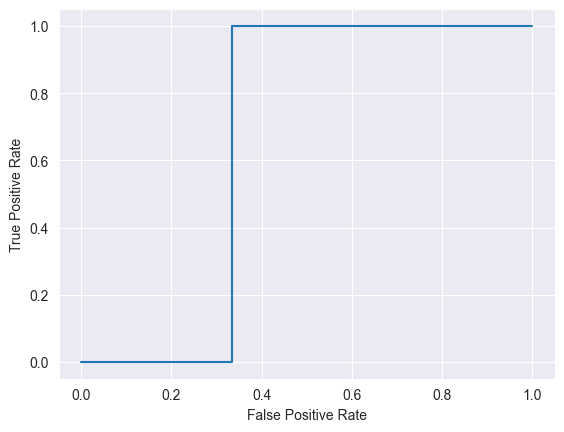

In [27]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_probs1)
#plot ROC Curve
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
roc_auc_score(y_test,y_pred_probs1)

NameError: name 'roc_auc_score' is not defined

In [29]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_prob=lr.predict_proba(X_test)
y_pred=lr.predict(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: Found input variables with inconsistent numbers of samples: [10, 254]

In [31]:
df=pd.read_csv("HR_comma_sep.csv")
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25,stratify=y)
scaler=StandardScaler()
x_trn_scl=scaler.fit_transform(X_train)
x_tst_scl=scaler.transform(X_test)
y_pred_prob=lr.predict_proba(x_tst_scl)
y_pred=lr.predict(x_tst_scl)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
accuracy_score(y_test,y_pred)

C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dai\PycharmProjects\PythonLab\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: multiclass format is not supported

In [ ]:
df=pd.read_csv("comp.csv")
y_pred_probs1